# # Bio BERT 

In [361]:
import warnings

In [362]:
warnings.filterwarnings('ignore')

In [363]:
import tensorflow as tf

In [364]:
import pandas as pd

In [365]:
tf.__version__

'1.11.0'

In [366]:
# Getting the Input data from PubMed articals

In [367]:
import os

In [368]:
ROOT = os.getcwd()

In [20]:
type(ROOT)

str

#### ROOT DIRECTORY

In [369]:
print(f'Location of the Current directory = {ROOT}')

Location of the Current directory = C:\Users\sav76\Downloads\Capstone Project\biobert_summ


In [370]:
#dataframe = pd.read_csv('first100.csv', index_col='Unnamed: 0')

In [371]:
#dataframe.info()

#### INPUT AND OUTPUT

In [374]:
source_input = ROOT + "\data\input\health3.txt"

In [375]:
source_output = ROOT + "\data\output\summary3.txt"

In [376]:
source_input

'C:\\Users\\sav76\\Downloads\\Capstone Project\\biobert_summ\\data\\input\\health3.txt'

In [377]:
source_output

'C:\\Users\\sav76\\Downloads\\Capstone Project\\biobert_summ\\data\\output\\summary3.txt'

In [378]:
import nltk

In [379]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sav76\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Preprocessing the given input data

In [380]:
# Using some junk data available in the open repository like github

In [381]:
source_data = []

In [382]:
with open(source_input, 'r') as ins:
    source_data.extend(ins.readlines())

In [383]:
print(f'Total number of sentences found in the given dataset = {len(source_data)}')

Total number of sentences found in the given dataset = 1


In [384]:
# Removing all the new line characters available form the data

In [385]:
source_data = [data.replace('\n', '') for data in source_data]

In [386]:
# Creating one 

In [387]:
source_data = ". ".join(source_data)

In [388]:
# Source data after performing above transformation

In [389]:
source_data

'it occurs in more than 50% of patients and may reach 90% in certain types of cancers , especially in patients undergoing chemotherapy and/or radiation therapy.1 anemia is defined as an inadequate circulating level of hemoglobin ( hb ) ( hb < 12 g / dl ) and may arise as a result of the underlying disease , bleeding , poor nutrition , chemotherapy , or radiation therapy . \\n preliminary studies suggest that survival and loco - regional control after radiation therapy , especially in head and neck cancers , may be compromised by anemia.24 anemia often worsens symptoms such as fatigue , weakness , and dyspnea , and thus may have a negative effect on quality of life ( qol ) and performance status in patients with cancer . \\n thus , to improve physical functioning , qol , and prognosis in patients with cancer , it would be reasonable to take a proactive approach in identifying populations who need treatment for cancer - associated anemia ( caa ) and provide timely management . \\n blood 

In [390]:
print(f'Total number of sentences avaialable in the above source dataset = {len(source_data.split("."))}')

Total number of sentences avaialable in the above source dataset = 140


In [391]:
print(f'Total number of words available in the above source dataset = {len(source_data.split(" "))}')

Total number of words available in the above source dataset = 3331


##### Tokenizing the given document using nltk tokenizier

In [392]:
# Sentences conversion from the given dataset

In [393]:
input_sentences = nltk.sent_tokenize(source_data)

In [394]:
# Removing all the empty sentences 

In [395]:
input_sentences = list(filter(lambda sentence: len(sentence) > 0, input_sentences))

In [396]:
print(f'Total number of sentences after removed un-necessary sentences = {len(input_sentences)}')

Total number of sentences after removed un-necessary sentences = 81


In [397]:
# Tokenizing into words

In [398]:
# Using nltk tokenizer

In [399]:
tokenized_sentences = list(map(lambda sentence: str(nltk.word_tokenize(sentence)), input_sentences))

In [400]:
type(tokenized_sentences)

list

In [401]:
print(f'Total number of words available after tokenizing the given source sentences = {len(tokenized_sentences)}')

Total number of words available after tokenizing the given source sentences = 81


In [402]:
tokenized_sentences[:5]

["['it', 'occurs', 'in', 'more', 'than', '50', '%', 'of', 'patients', 'and', 'may', 'reach', '90', '%', 'in', 'certain', 'types', 'of', 'cancers', ',', 'especially', 'in', 'patients', 'undergoing', 'chemotherapy', 'and/or', 'radiation', 'therapy.1', 'anemia', 'is', 'defined', 'as', 'an', 'inadequate', 'circulating', 'level', 'of', 'hemoglobin', '(', 'hb', ')', '(', 'hb', '<', '12', 'g', '/', 'dl', ')', 'and', 'may', 'arise', 'as', 'a', 'result', 'of', 'the', 'underlying', 'disease', ',', 'bleeding', ',', 'poor', 'nutrition', ',', 'chemotherapy', ',', 'or', 'radiation', 'therapy', '.']",
 "['\\\\n', 'preliminary', 'studies', 'suggest', 'that', 'survival', 'and', 'loco', '-', 'regional', 'control', 'after', 'radiation', 'therapy', ',', 'especially', 'in', 'head', 'and', 'neck', 'cancers', ',', 'may', 'be', 'compromised', 'by', 'anemia.24', 'anemia', 'often', 'worsens', 'symptoms', 'such', 'as', 'fatigue', ',', 'weakness', ',', 'and', 'dyspnea', ',', 'and', 'thus', 'may', 'have', 'a', 'ne

In [403]:
# Some sanity check

In [404]:
source_input

'C:\\Users\\sav76\\Downloads\\Capstone Project\\biobert_summ\\data\\input\\health3.txt'

In [405]:
input_filename = source_input.split('\\')[-1]

In [406]:
input_filename

'health3.txt'

In [407]:
input_filename = input_filename.split('.')[0]

In [408]:
input_filename

'health3'

In [409]:
STAGE_DIR = f"STAGE_DIR/stage_{input_filename}.txt"

In [410]:
STAGE_DIR

'STAGE_DIR/stage_health3.txt'

In [411]:
TOKEN_DIR = f"STAGE_DIR/tokens_{input_filename}.txt"

In [412]:
TOKEN_DIR

'STAGE_DIR/tokens_health3.txt'

In [413]:
stage_file = open(STAGE_DIR, 'w')

In [414]:
token_file = open(TOKEN_DIR, 'w')

In [415]:
stage_file.write('\n'.join(input_sentences))

18354

In [416]:
token_file.write('\n'.join(tokenized_sentences))

28585

In [417]:
stage_file.close() # Closing the opened resources

In [418]:
token_file.close() # Closing the opened resources

##### Extracting the features from above intermedidate data

In [419]:
# Running the BERT script to generate or extract the given features

In [420]:
import subprocess # need subprocess script to run the below script

In [421]:
FEATURES_OUT_DIR = f'STAGE_DIR/features_{input_filename}.jsonl'

In [422]:
FEATURES_OUT_DIR

'STAGE_DIR/features_health3.jsonl'

In [423]:
# features_file = open(FEATURES_OUT_DIR, 'w')

In [424]:
# features_file.close() # Closing the opened resources 

In [425]:
# extraction_scrpit = f"python BERT/extract_features.py --input_file=stage_health.txt --output_file=features_health.json --vocab_file=BERT/vocab.txt --bert_config_file=BERT/bert_config.json --init_checkpoint=BERT/model.ckpt-1000000 --layers=-1 --max_seq_length=128 --batch_size=8" 

extraction_scrpit = f"python BERT/extract_features.py \
    --input_file={STAGE_DIR} \
    --output_file={FEATURES_OUT_DIR} \
    --vocab_file=BERT/vocab.txt \
    --bert_config_file=BERT/bert_config.json \
    --init_checkpoint=BERT/model.ckpt-1000000 \
    --layers=-1 \
    --max_seq_length=128 \
    --batch_size=8" 

In [426]:
subprocess.call(extraction_scrpit, shell=True)

0

### Sentence Representation

In [427]:
# doing sentence representation from the given dataset

In [428]:
STAGE_DIR

'STAGE_DIR/stage_health3.txt'

In [429]:
FEATURES_OUT_DIR

'STAGE_DIR/features_health3.jsonl'

In [430]:
input_file = open(STAGE_DIR)

In [431]:
features_file = open(FEATURES_OUT_DIR)

In [432]:
sentences = input_file.read()

In [433]:
sentences = nltk.sent_tokenize(sentences)

In [434]:
# creating some custom classes to hold the information of our input, features etc.,

In [435]:
import math

In [436]:
class Feature:
    
    def __init__(self, word):
        self.token = word
        self.weight_list = []

In [437]:
type(Feature)

type

In [438]:
class Sentence:
    
    def __init__(self, number, text):
        
        self.sentence_number = number
        self.sentence_text = text
        self.average_distance = 0
        self.feature_list = []
        self.representation = []
        self.cluster_index = 0
        
    def set_token_list(self, token_list):
        self.feature_list = token_list
        
    def get_token_list(self):
        return self.feature_list

In [439]:
type(Sentence)

type

In [440]:
class Cluster:
    
    def __init__(self, number):
        
        self.cluster_number = number
        self.mean = []
        self.members = []
        self.summary_members = 0
        
    def add_member(self, sentence_index):
        self.members.append(sentence_index)
        
    def remove_member(self, sentence_index):
        self.members.append(sentence_index)

In [441]:
type(Cluster)

type

In [442]:
# creating sentence list by using the above classes

In [443]:
sentence_list = list(map(lambda sentence: Sentence(sentence[0], sentence[1]), enumerate(sentences)))

In [444]:
sentence_list[:5]

In [445]:
len(sentence_list)

81

In [446]:
import json_lines

In [447]:
import re

In [448]:
sentence_number = 0

In [449]:
with open(FEATURES_OUT_DIR, 'r') as input_feature:
    
    for feature_line in json_lines.reader(input_feature):
        
        feature_set = feature_line['features']
        
        for feature in feature_set:
            
            if feature['token'] in ['[CLS]', '[SEP]']:
                
                continue;
                
            temp_features = Feature(feature['token'])
            
            for layer in feature['layers']:
                
                temp_features.weight_list.extend(layer['values'])
                
            sentence_list[sentence_number].feature_list.append(temp_features)
            
        sentence_number += 1

In [450]:
sentence_number

81

In [451]:
# Computing the representation for every sentence

for sentence in sentence_list:
    
    sentence.representation = [0.0] * len(sentence.feature_list[0].weight_list)
    
    for feature in sentence.feature_list:
        
        idx = 0
        
        for weight in feature.weight_list:
            
            sentence.representation[idx] += weight
            
            idx += 1
            
    sentence.representation = [representation / 2 for representation in sentence.representation]

In [452]:
len(sentence_list)

81

In [453]:
# Sample Representation of the above sentence

In [454]:
sentence_list[0].sentence_number

0

In [455]:
sentence_list[0].sentence_text

'it occurs in more than 50% of patients and may reach 90% in certain types of cancers , especially in patients undergoing chemotherapy and/or radiation therapy.1 anemia is defined as an inadequate circulating level of hemoglobin ( hb ) ( hb < 12 g / dl ) and may arise as a result of the underlying disease , bleeding , poor nutrition , chemotherapy , or radiation therapy .'

In [456]:
sentence_list[0].average_distance

0

In [457]:
sentence_list[0].feature_list[5].token

'50'

In [458]:
# sentence_list[0].feature_list[0].weight_list

In [459]:
# sentence_list[0].representation

In [460]:
sentence_list[0].cluster_index

0

In [461]:
def is_itemize(sentence):
    
    if len(sentence.feature_list) == 1 and re.match('.|-', sentence.feature_list[0].token):
        
        return True
    
    if len(sentence.feature_list) == 2 and re.match('\d+|\(\d+\)', sentence.feature_list[0].token) and re.match('.|-', sentence.feature_list[1].token):
        
        return True
    
    else:
        
        return False

In [462]:
sentence_list = list(filter(lambda x: is_itemize(x) == False, sentence_list))

In [463]:
len(sentence_list)

81

In [464]:
representations = list(map(lambda sentence: sentence.representation, sentence_list))

In [465]:
len(representations)

81

In [466]:
# applying the clustering technique

In [467]:
# for the given representation

In [468]:
from sklearn.cluster import KMeans

In [469]:
from kneed import KneeLocator

In [470]:
import matplotlib.pyplot as plt

In [471]:
%matplotlib inline

In [472]:
from scipy.spatial import distance

#### Performing elbow test on the given dataset

In [474]:
def elbow_test(data, n_initial:int = 10, max_clusters: int = 30, max_iter:int = 300) -> int:
    
    distortions = []
    
    for cluster in range(1, max_clusters):
        
        kmeans = KMeans(n_clusters=cluster,
                       init='random',
                       n_init=n_initial,
                       max_iter=max_iter,
                       tol=1e-04,
                       random_state=42)
        
        kmeans.fit(X=data, y=None)
        
        distortions.append(kmeans.inertia_)
        
    plt.plot(range(1, max_clusters), distortions, marker='o')
    
    plt.xlabel('Number of Clusters')
    
    plt.ylabel('Distortion')
    
    plt.savefig('kmeans-clustering.png')
    
    locator = KneeLocator(range(1, max_clusters), 
                          distortions, 
                          curve='convex', 
                          direction='decreasing', 
                          interp_method='interp1d')
    
    return locator.knee

    predictions = data[data.columns[1:]]
    
    n_clusters = elbow_test(predictions, 10, 20, 300)
    
    print(f'Number of Clusters: {n_clusters}')
    
    return n_clusters

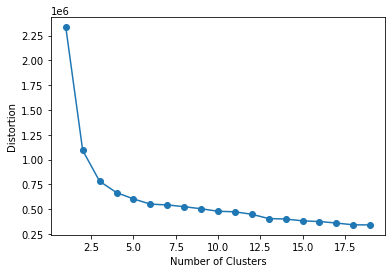

In [475]:
n_clusters = elbow_test(representations, n_initial=10, max_clusters=20, max_iter=10000)

In [476]:
type(n_clusters)

numpy.int32

In [477]:
n_clusters

4

##### Performing the KMeans clustering on the given representation

In [479]:
def clustering_kmeans(sentences, n_clusters):
    
    representation = list(map(lambda sentence: sentence.representation, sentences))
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    
    # Fitting on the given representation
    kmeans.fit(X=representation, y=None)
    
    # Predicting on the given representation
    y_pred = kmeans.predict(X=representation)
    
    centers = kmeans.cluster_centers_
    
    for idx in range(len(y_pred)):
        
        cluster_number = y_pred[idx]
        
        sentences[idx].avg_distance = distance.euclidean(centers[cluster_number], sentences[idx].representation)
        
        sentences[idx].cluster_index = cluster_number
        
    return sentences

In [480]:
sentence_list = clustering_kmeans(sentence_list, n_clusters=n_clusters)

In [481]:
type(sentence_list)

list

In [482]:
len(sentence_list)

81

In [483]:
sentence_list[-1].average_distance

0

In [484]:
sentence_list[-1].cluster_index

2

### Produceing Summary using the above Code

In [485]:
def produce_summary(compression_ratio, sentence_list, n_clusters):
    
    summary_index = []
    
    for idx in range(0, n_clusters):
        
        cluster = Cluster(idx)
        
        cluster.members = list(filter(lambda sentence: sentence.cluster_index == idx, sentence_list))
        
        cluster.summary_members = math.ceil(len(cluster.members) * compression_ratio)
        
        if cluster.summary_members == 0:
            
            cluster.summary_members = 1
            
        cluster.members = sorted(cluster.members, key=lambda x: x.avg_distance, reverse=False)
        
        summary_index.extend(cluster.members[:cluster.summary_members])
        
    summary_index = list(map(lambda x: x.sentence_number, summary_index))
    
    summary_index = sorted(summary_index)
    
    return summary_index

In [486]:
summery_index = produce_summary(compression_ratio=0.10, sentence_list=sentence_list, n_clusters=n_clusters)

In [487]:
type(summery_index)

list

In [488]:
len(summery_index)

10

In [489]:
summery_index[:1]

[12]

In [490]:
# generating the final summary

In [491]:
def generate_final_summay(indexes, sentences, output_address):
    
    final_summay = ''
    
    idx = 0
    
    for index in indexes:
        
        if idx > 0:
            
            final_summay += ' '
            
        final_summay += sentence_list[index].sentence_text
        
        idx += 1
        
    print(final_summay)
        
    outfile = open(output_address, 'w')
    
    outfile.write(final_summay)
    
    outfile.close()

In [492]:
generate_final_summay(summery_index, sentences=sentence_list, output_address='data/output/summary3.txt')

\n patients were also required to have a serum ferritin level of 100 ng / ml or higher or transferrin saturation ( tsat ) levels of 15% or higher and to have received no esas or iv iron therapy within 30 days and no oral iron therapy ( 27 mg / day or more ) within 7 days before enrollment . the first dose was given during the first clinic visit ( 4 days from the initiation of chemotherapy or radiation therapy ) . \n patients were also required to have a serum ferritin level of 100 ng / ml or higher or transferrin saturation ( tsat ) levels of 15% or higher and to have received no esas or iv iron therapy within 30 days and no oral iron therapy ( 27 mg / day or more ) within 7 days before enrollment . \n the first dose was given during the first clinic visit ( 4 days from the initiation of chemotherapy or radiation therapy ) . \n eight ( 42.1% ) of the 19 patients who completed at least three iron infusions had a more than 1 g / dl increase in their hb level . \n hemoglobin level changes

### Cosine Similarity Test Between Bert and Bio-BERT

In [276]:
!pip install gensim


  Using cached gensim-4.2.0-cp36-cp36m-win_amd64.whl


In [304]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from gensim.test.utils import common_texts

documents=[TaggedDocument(doc,[j]) for j, doc in enumerate(common_texts)]

model=Doc2Vec(documents, vector_size=5,window=2, min_count=1, workers=4)


from gensim.test.utils import get_tmpfile

fname=get_tmpfile("my_doc2vec_model")

model.save(fname)

model=Doc2Vec.load(fname)

list(model.infer_vector(ref_summary))

[-0.016910493, 0.062205613, -0.06265856, 0.0584929, 0.0055561303]

##### Reference Annotated Summary from pubmed-summarization

In [494]:
ref_summary=["backgroundanemia in patients with cancer who are undergoing active therapy is commonly encountered and may worsen quality of life in these patients . the effect of blood transfusion is often temporary and may be associated with serious adverse events . \n erythropoiesis - stimulating agents are not effective in 30%50% of patients and may have a negative effect on overall survival.aimsto assess the efficacy and feasibility of intravenous iron therapy in patients with cancer who have non - iron - deficiency anemia and who are undergoing treatment with chemotherapy without the use of erythropoiesis - stimulating agents.methodsadult patients with solid cancers and non - iron - deficiency anemia were included . \n ferric sucrose at a dose of 200 mg was given in short intravenous infusions weekly for a total of 12 weeks . \n hemoglobin level was measured at baseline , every 3 weeks , and 2 weeks after the last iron infusion ( week 14 ) . \n adverse events related to intravenous iron were prospectively reported.resultsof 25 patients included , 19 ( 76.0% ) completed at least three iron infusions and 14 ( 56.0% ) finished the planned 12 weeks of therapy . \n the mean hemoglobin level of the 25 patients at baseline was 9.6 g / dl ( median , 9.9 g / dl ; range , 6.9 g / dl 10.9 g / dl ) . the mean change in hemoglobin level for the 15 patients who completed at least 9 treatments was 1.7 g / dl ( median , 1.1 g / dl ; range , 1.9 g / dl to 3.2 g / dl ) ; it reached 2.1 g / dl ( median , 1.3 g / dl ; range , 0.2 g / dl to 4.6 g / dl ; p = 0.0007 ) for the 14 patients who completed all 12 weekly treatments . \n five ( 20.0% ) patients were transfused and considered as treatment failures . \n no treatment - related adverse events were reported.conclusionintravenous iron treatment alone is safe and may reduce blood transfusion requirements and improve hemoglobin level in patients with cancer who are undergoing anticancer therapy . \n further randomized studies are needed to confirm these findings ."]

##### Summary generated through Bio-BERT

In [495]:
summary_gen = ["patients were also required to have a serum ferritin level of 100 ng / ml or higher or transferrin saturation ( tsat ) levels of 15% or higher and to have received no esas or iv iron therapy within 30 days and no oral iron therapy ( 27 mg / day or more ) within 7 days before enrollment . the first dose was given during the first clinic visit ( 4 days from the initiation of chemotherapy or radiation therapy ) . \n patients were also required to have a serum ferritin level of 100 ng / ml or higher or transferrin saturation ( tsat ) levels of 15% or higher and to have received no esas or iv iron therapy within 30 days and no oral iron therapy ( 27 mg / day or more ) within 7 days before enrollment . \n the first dose was given during the first clinic visit ( 4 days from the initiation of chemotherapy or radiation therapy ) . \n eight ( 42.1% ) of the 19 patients who completed at least three iron infusions had a more than 1 g / dl increase in their hb level . \n hemoglobin level changes for the 14 patients who completed twelve iron infusions are shown in figure 1 . \n tsat was monitored during the study period , and no patients had tsat levels increase to more than 50% . given that the mean hb increase using esas with iv iron in one large controlled trial was 2.4 g / dl,21 the results obtained in our study are clinically significant . \n the highest serum ferritin level in the present study in patients who completed at least 9 weeks of iv iron therapy was 1,170 ng / ml . \n published reviews report an increase in hepatocellular carcinoma only in patients with hemochromatosis after they develop cirrhosis.29 similarly data supporting the association between iv iron therapy and higher infection rate are weak and not well - supported.30 in fact , anemia itself is a risk factor for infections in patients receiving hemodialysis.31 a multivariate analysis of associations between iron and mortality in more than 58,000 patients receiving hemodialysis reported no increased death rate from serum ferritin levels as high as 1,200 ng / ml.30 the increasing cost of therapy in patients with cancer is of grave concern , which could be an additional benefit of iv iron over the use of esas in such patients ."]

In [301]:
#ref_summary[0]

In [496]:
p=model.infer_vector(ref_summary)
vector_ref = p
q=[model.infer_vector(summary_gen)]
vector_sum = q
#vector_ref.append(model.infer_vector(ref_summary[i]))
#vector_sum.append(model.infer_vector(summary_from_model[i]))

In [497]:
from sklearn.metrics.pairwise import cosine_similarity

In [498]:
vv=vector_ref.reshape(1,-1)

#### Cosine Similarity score of 0.84 with Reference Summary

In [499]:
cosine_similarity(vv,vector_sum)

array([[0.84612]], dtype=float32)

#### BERT model summary for the same article

In [504]:
bert_ex = ["it occurs in more than 50 of patients and may reach 90 in certain types of cancers  especially in patients undergoing chemotherapy andor radiation therapy 26 anemia of chronic disease may occur in patients with cancer and is associated with an increase in hepcidin levels  which decreases oral iron absorption and bone marrow iron use  negating any possible effect of regular doses of oral iron"]

In [505]:
p2=model.infer_vector(ref_summary)
vector_ref2 = p2
q2=[model.infer_vector(bert_ex)]
vector_sum2 = q2
#vector_ref.append(model.infer_vector(ref_summary[i]))
#vector_sum.append(model.infer_vector(summary_from_model[i]))

In [506]:
vv=vector_ref.reshape(1,-1)

#### Cosine Similarity score of -0.42 with Reference Summary

In [507]:
cosine_similarity(vv,vector_sum2)

array([[-0.4271493]], dtype=float32)

#### We find Cosine similarity of Bio Bert(0.84) to be higher than Bert Model(-0.42) with respect to reference Abstract summary

#### Bio-BERT wrt BERT summary score

In [510]:
cosine_similarity(vector_sum,vector_sum2)

array([[-0.5174275]], dtype=float32)